This notebook is part of the *orix* documentation https://orix.rtfd.io. Links to the documentation won’t work from the notebook.

# Stereographic projection

The stereographic projection maps a sphere onto a plane, and preserves angles at
which curves meet. In orix, the projection is used to project unit
[Vector3d](reference.rst#orix.vector.Vector3d) objects onto the equatorial plane
represented in spherical coordinates, notably the azimuth angle $\phi$, in the
range $[0^{\circ}, 360^{\circ}]$, and the polar angle $\theta$, in the range
$[0^{\circ}, 90^{\circ}]$ on the upper hemisphere and
$[90^{\circ}, 180^{\circ}]$ on the lower hemisphere. The projection is
implemented in
[StereographicProjection](reference.rst#orix.projections.StereographicProjection),
together with the
[InverseStereographicProjection](reference.rst#orix.projections.InverseStereographicProjection).
These are used in the
[StereographicPlot](reference.rst#orix.plot.StereographicPlot), which extends
Matplotlib's projections framework for plotting of `Vector3d` objects.

This user guide shows how to plot vectors in the stereographic projection, and
how to customize the stereographic plots.

In [1]:
# Exchange "inline" for:
# "qt5" for interactive plotting from the pyqt package
# "notebook" for inline interactive plotting when running on Binder
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from orix import vector


# We'll want our plots to look a bit larger than the default size
new_params = {
    "figure.figsize": (10, 10),
    "lines.markersize": 10,
    "font.size": 20,
    "axes.grid": False,
}
plt.rcParams.update(new_params)

## Plot vectors

Plotting three vectors with
[StereographicPlot.scatter()](reference.rst#orix.plot.StereographicPlot.scatter)
without customizing the plot

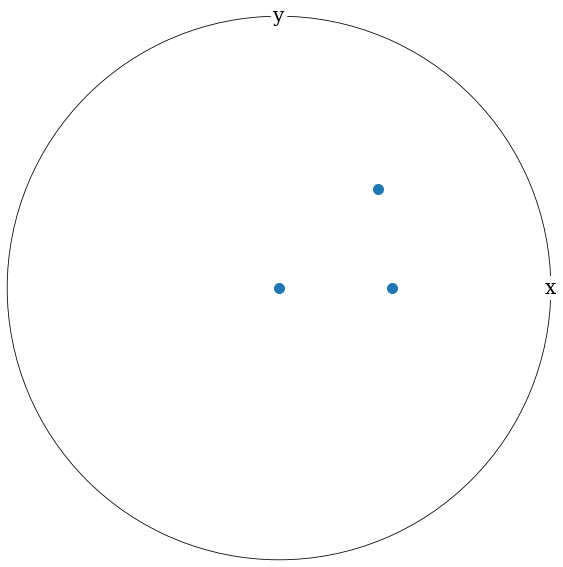

In [2]:
v1 = vector.Vector3d([[0, 0, 1], [1, 0, 1], [1, 1, 1]])
v1.scatter()

Hover the cursor over the equatorial plane to see the spherical coordinates when
plotting interactively.

Let's turn on the azimuth and polar grid by updating the Matplotlib preferences.

In [3]:
plt.rcParams["axes.grid"] = True

### Upper and lower hemisphere

We can plot vectors impinging on the upper hemisphere or the lower hemisphere
by setting the
[StereographicPlot.hemisphere](reference.rst#orix.plot.StereographicPlot.hemisphere)
attribute. Remember to set the hemisphere before calling `scatter()`.

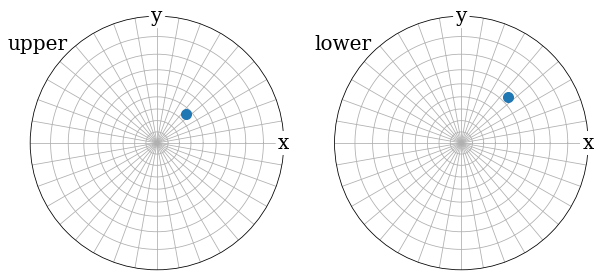

In [4]:
v2 = vector.Vector3d([[1, 1, 2], [1, 1, -1]])
v2.scatter(hemisphere="both")

### Control grid

The polar and azimuth grid resolution can be set either upon axis initialization
or after the axis is created using
[StereographicPlot.polar_grid()](reference.rst#orix.plot.StereographicPlot.polar_grid)
and
[StereographicPlot.azimuth_grid()](reference.rst#orix.plot.StereographicPlot.azimuth_grid).
The default grid resolution is $10^{\circ}$ for both grids, but these can be
changed separately

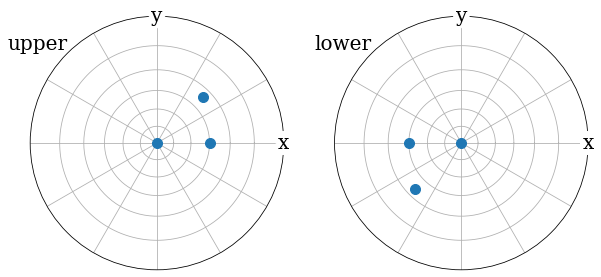

In [5]:
v3 = vector.Vector3d(np.append(v1.data, -v1.data, axis=0))
v3.scatter(hemisphere="both", grid_resolution=(15, 30))

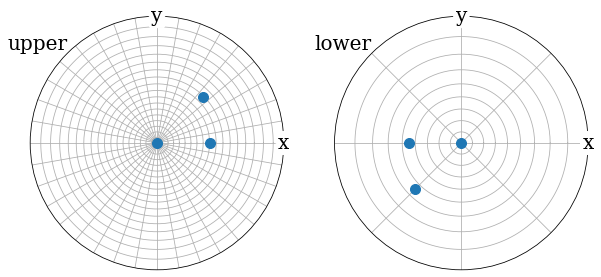

In [6]:
v3.scatter(hemisphere="both")
ax0, ax1 = v3.figure.axes
ax0.polar_grid(5)
ax1.azimuth_grid(45)

### Annotate vectors

Vectors can be annotated by looping over them and adding text markers using
[StereographicPlot.text()](reference.rst#orix.plot.StereographicPlot.text)

In [8]:
format_vector = lambda v: str(v.data[0]).replace(" ", "")
#labels=[format_vector(i) for i in v3]

v3.scatter(hemisphere="both", labels=[format_vector(i) for i in v3][0])

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fb305e661f0> (for post_execute):


ValueError: not enough values to unpack (expected 2, got 0)

ValueError: not enough values to unpack (expected 2, got 0)

<Figure size 720x720 with 2 Axes>

In [ ]:
## fig, ax = plt.subplots(ncols=2, subplot_kw=dict(projection="stereographic"))

format_vector = lambda v: str(v.data[0]).replace(" ", "")

ax[0].scatter(v1)
ax[0].show_hemisphere_label()
for vi in v1:
    ax[0].text(vi, s=format_vector(vi))
    
v3 = vector.Vector3d([[0, 0, -1], [-1, 0, -1], [-1, -1, -1]])
ax[1].hemisphere = "lower"
ax[1].scatter(v3)
ax[1].show_hemisphere_label()
for vi in v3[:2]:
    ax[1].text(vi, s=format_vector(vi))
for vi in v3[2:]:
    ax[1].text(vi, s=format_vector(vi))

### Pass spherical coordinates

We can also pass azimuth and polar angles instead of passing vectors

In [ ]:
fig, ax = plt.subplots(
    figsize=(5, 5), subplot_kw=dict(projection="stereographic")
)
azimuth = np.deg2rad([0, 60, 180])
polar = np.deg2rad([0, 60, 60])
ax.scatter(azimuth, polar, c=["C0", "C1", "C2"], s=200)
ax.set_labels("RD", "TD", None)

Here, we also passed `None` to
[StereographicPlot.set_labels()](reference.rst#orix.plot.StereographicPlot.set_labels)
so that the Z axis label is not shown.

## Experimental functionality

Plot symmetry elements of point groups with proper rotations only, using
[StereographicPlot.symmetry_marker()](reference.rst#orix.plot.StereographicPlot.symmetry_marker)

In [ ]:
fig, ax = plt.subplots(ncols=2, subplot_kw=dict(projection="stereographic"))

marker_size = 500
ax[0].grid(False)
ax[0].set_title("432", pad=20)
# 4-fold (outer markers will be clipped a bit...)
v4fold = vector.Vector3d(
    [[0, 0, 1], [1, 0, 0], [-1, 0, 0], [0, 1, 0], [0, -1, 0]]
)
ax[0].symmetry_marker(v4fold, fold=4, c="C4", s=marker_size)
ax[0].circle(v4fold, c="C4")
# 3-fold
v3fold = vector.Vector3d([[1, 1, 1], [1, -1, 1], [-1, -1, 1], [-1, 1, 1]])
ax[0].symmetry_marker(v3fold, fold=3, c="C3", s=marker_size)
ax[0].circle(v3fold, c="C3")
# 2-fold
v2fold = vector.Vector3d([
    [1, 0, 1],
    [0, 1, 1],
    [-1, 0, 1],
    [0, -1, 1],
    [1, 1, 0],
    [-1, -1, 0],
    [-1, 1, 0],
    [1, -1, 0],
])
ax[0].symmetry_marker(v2fold, fold=2, c="C2", s=marker_size)
ax[0].circle(v2fold, c="C2")

ax[1].grid(False)
ax[1].set_title("222", pad=20)
# 2-fold
v2fold = vector.Vector3d([
    [0, 0, 1], [1, 0, 0], [-1, 0, 0], [0, 1, 0], [0, -1, 0]
])
ax[1].symmetry_marker(v2fold, fold=2, c="C2", s=800)
ax[1].circle(v2fold, c="C2")